<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab8_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pygad
import pygad.gann
import matplotlib.pyplot as plt

 Defines the coordinates of 5 cities on a 2D plane

In [13]:
# Coordinates of cities
cities_coordinates = np.array([
    [0, 0],   # City 1
    [10, 0],  # City 2
    [10, 10], # City 3
    [0, 10],  # City 4
    [5, 5]    # City 5
])

In [14]:
# Number of cities
num_cities = len(cities_coordinates)
num_cities

5

Calculates the pairwise distances between all cities.
* Loops over every city (i) and calculates the Euclidean distance to all other cities (j).

In [15]:
# Calculate the distance matrix
def calculate_distance_matrix(coords):
    num_points = len(coords)
    distance_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])
    return distance_matrix

distance_matrix = calculate_distance_matrix(cities_coordinates)

Determines how good a solution (route) is by calculating its total distance. Shorter distances are better.
* Adds up distances for all consecutive cities in the route.

In [16]:
# Fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Decode the solution as a route
    route = solution.astype(int)
    route_distance = 0

    # Calculate the total distance of the route
    for i in range(len(route) - 1):
        route_distance += distance_matrix[route[i], route[i + 1]]
    # Add the distance to return to the starting city
    route_distance += distance_matrix[route[-1], route[0]]

    # Minimize distance, so return negative fitness
    return -route_distance

Configures the Genetic Algorithm (GA) to solve the Traveling Salesman Problem (TSP).

Parametrs
* num_generations=500: Runs 500 iterations to evolve better solutions.
* fitness_func=fitness_function: Uses the custom fitness function to evaluate routes.
* gene_space=gene_space: Limits solutions to valid city indices.
* allow_duplicate_genes=False: Ensures cities are not repeated in a route.
* mutation_type="swap": Mutates the route by swapping two cities to explore new solutions.

In [17]:
# Gene space: cities indices
gene_space = list(range(num_cities))

# PyGAD configuration
ga_instance = pygad.GA(
    num_generations=500,
    num_parents_mating=5,
    fitness_func=fitness_function,
    sol_per_pop=10,
    num_genes=num_cities,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="swap",
    mutation_probability=0.2,
    allow_duplicate_genes=False
)

# Run the genetic algorithm
ga_instance.run()

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [18]:
# Retrieve the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
best_route = solution.astype(int)

Gets the best route (solution) found by the GA, its fitness value (solution_fitness), and its index in the population.

The below code snippet Creates a visualization of the cities and the route as a sequence of arrows

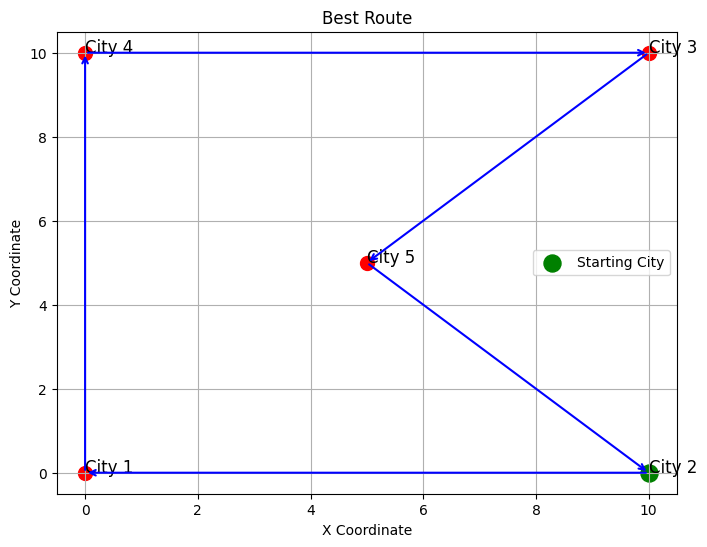

In [27]:
plt.figure(figsize=(8, 6))

# Plot all cities
for i in range(num_cities):
    if i == best_route[0]:
        plt.scatter(cities_coordinates[i, 0], cities_coordinates[i, 1], color='green', s=150, label="Starting City")
    else:
        plt.scatter(cities_coordinates[i, 0], cities_coordinates[i, 1], color='red', s=100)

    plt.text(cities_coordinates[i, 0], cities_coordinates[i, 1], f"City {i+1}", fontsize=12)

for i in range(len(best_route) - 1):
    plt.annotate(
        '',
        xy=(cities_coordinates[best_route[i + 1], 0], cities_coordinates[best_route[i + 1], 1]),
        xytext=(cities_coordinates[best_route[i], 0], cities_coordinates[best_route[i], 1]),
        arrowprops=dict(arrowstyle="->", color='blue', lw=1.5),
    )

plt.annotate(
    '',
    xy=(cities_coordinates[best_route[0], 0], cities_coordinates[best_route[0], 1]),
    xytext=(cities_coordinates[best_route[-1], 0], cities_coordinates[best_route[-1], 1]),
    arrowprops=dict(arrowstyle="->", color='blue', lw=1.5),
)
plt.legend()

# Plot customization
plt.title("Best Route")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid()
plt.show()


In [20]:
# Print the results
print("Best route:", best_route)
print("Shortest distance:", -solution_fitness)

Best route: [1 0 3 2 4]
Shortest distance: 44.14213562373095


* This is the sequence of city indices representing the best route found by the genetic algorithm:
City 2 → City 1 → City 4 → City 3 → City 5
* The route is optimized to minimize the total distance traveled while visiting all cities exactly once and returning to the starting city
* Shortest distance is calculated using the Euclidean distance between consecutive cities in the sequence and including the return trip from the last city to the starting city.